In [35]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("Health_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

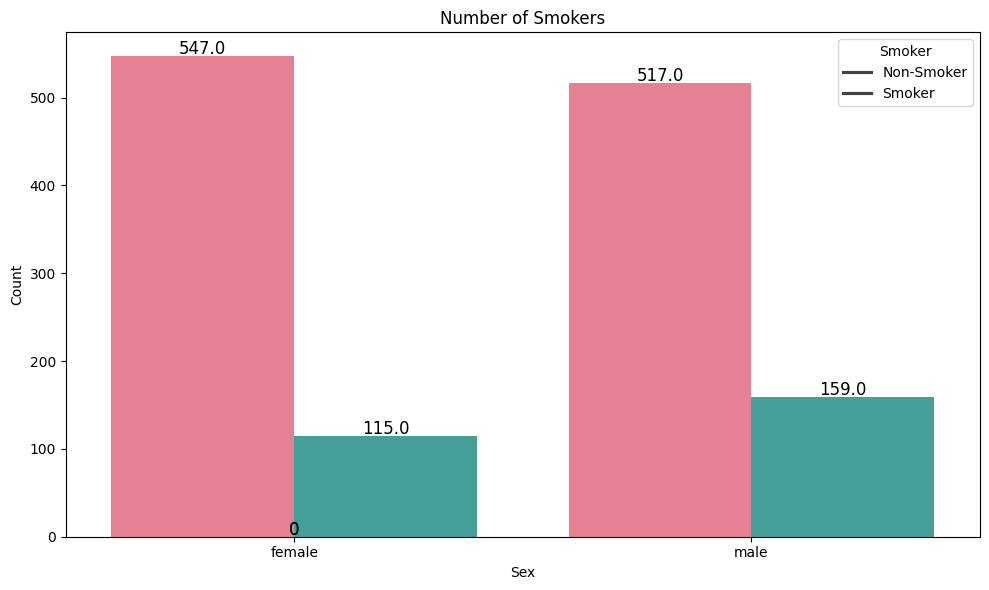

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daten vorbereiten
smoker_counts = data.groupby(["sex", "smoker"]).size().unstack(fill_value=0).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=smoker_counts.melt(id_vars=["sex"], var_name="Smoker", value_name="Count"), 
                 x="sex", y="Count", hue="Smoker", palette="husl")

# Werte über den Balken anzeigen
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title("Number of Smokers")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Smoker", labels=["Non-Smoker", "Smoker"], loc="upper right")
plt.tight_layout()
plt.show()


Gemäß der obigen Visualisierung rauchen 547 Frauen und 517 Männer nicht und 115 Frauen und 159 Männer rauchen.

In [38]:
data["sex"] = data["sex"].map({"female": 0, "male": 1})
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})
print(data.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


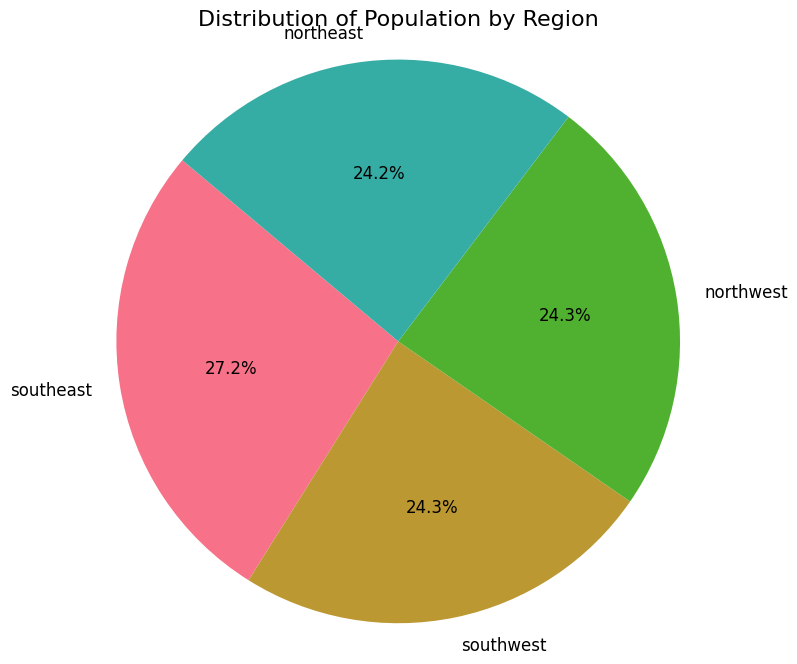

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daten vorbereiten
pie = data["region"].value_counts()
regions = pie.index
population = pie.values

plt.figure(figsize=(8, 8))
sns.set_palette("husl")
plt.pie(population, labels=regions, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title("Distribution of Population by Region", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [40]:
data["region"] = data["region"].map({"southwest": 0, "northwest": 1,"northeast": 2, "southeast": 3  })
print(data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       3   1725.55230
2   28    1  33.000         3       0       3   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [41]:
data_encoded = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)

correlation_matrix = data_encoded.corr()

print(correlation_matrix)


               age       bmi  children   charges     sex_1  smoker_1  \
age       1.000000  0.109272  0.042469  0.299008 -0.020856 -0.025019   
bmi       0.109272  1.000000  0.012759  0.198341  0.046371  0.003750   
children  0.042469  0.012759  1.000000  0.067998  0.017163  0.007673   
charges   0.299008  0.198341  0.067998  1.000000  0.057292  0.787251   
sex_1    -0.020856  0.046371  0.017163  0.057292  1.000000  0.076185   
smoker_1 -0.025019  0.003750  0.007673  0.787251  0.076185  1.000000   
region_1 -0.000407 -0.135996  0.024806 -0.039905 -0.011156 -0.036945   
region_2  0.002475 -0.138156 -0.022808  0.006349 -0.002425  0.002811   
region_3 -0.011642  0.270025 -0.023066  0.073982  0.017117  0.068498   

          region_1  region_2  region_3  
age      -0.000407  0.002475 -0.011642  
bmi      -0.135996 -0.138156  0.270025  
children  0.024806 -0.022808 -0.023066  
charges  -0.039905  0.006349  0.073982  
sex_1    -0.011156 -0.002425  0.017117  
smoker_1 -0.036945  0.002811  0.0

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

x = data[["age", "sex", "bmi", "smoker"]]
y = data["charges"]

encoder = OneHotEncoder(drop='first')
x_encoded = encoder.fit_transform(x[['sex', 'smoker']]).toarray()

x_numeric = x.drop(['sex', 'smoker'], axis=1)
x = np.concatenate((x_numeric.values, x_encoded), axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR()
}

results = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    
    if name != "Linear Regression" and name != "SVR":
        accuracy = model.score(xtest, ytest)
    else:
        accuracy = None
    
    results[name] = {"MSE": mse, "R-squared": r2, "Accuracy": accuracy}

for name, result in results.items():
    print(f"Model: {name}")
    print(f"MSE: {result['MSE']}")
    print(f"R-squared: {result['R-squared']}")
    if result['Accuracy'] is not None:
        print(f"Accuracy: {result['Accuracy']}")
    print()


Model: Linear Regression
MSE: 34515553.666804485
R-squared: 0.7776757765738431

Model: Decision Tree
MSE: 44544977.86083575
R-squared: 0.7130734825798164
Accuracy: 0.7130734825798164

Model: Random Forest
MSE: 23623431.17238846
R-squared: 0.8478349488244272
Accuracy: 0.8478349488244272

Model: Gradient Boosting
MSE: 20272917.26443037
R-squared: 0.869416535197232
Accuracy: 0.869416535197232

Model: Support Vector Machine
MSE: 166441907.06500337
R-squared: -0.07209833836112844
Accuracy: -0.07209833836112844



In [44]:
from sklearn.ensemble import GradientBoostingRegressor
forest = GradientBoostingRegressor()
forest.fit(xtrain, ytrain)
ypred = forest.predict(xtest)
data = pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(data.head())

   Predicted Premium Amount
0               9974.687944
1               6880.874698
2              28930.992799
3               9229.245411
4              33748.349351


Zusammenfassung:

Die Prämienhöhe einer Krankenversicherung hängt von Person zu Person ab, da viele Faktoren die Prämienhöhe einer Krankenversicherung beeinflussen.